# Analyse des Avis Clients pour H&M

## Introduction

Dans un contexte où les avis et retours des clients jouent un rôle crucial dans l'amélioration continue des produits et services, il devient impératif pour les entreprises de comprendre en profondeur les perceptions et attentes de leur clientèle. C'est dans cette optique que nous nous proposons de développer un modèle de *topic modeling* afin d'analyser les avis et retours des clients sur les produits de la marque H&M.

Le *topic modeling*, ou modélisation de sujets, est une méthode de traitement automatique du langage naturel (TALN) qui permet d'extraire des thèmes ou sujets latents à partir d'un large corpus de textes. Grâce à cette technique, il est possible de dégager des tendances et des insights pertinents, facilitant ainsi la prise de décisions stratégiques.

## Objectifs du Projet

L'objectif principal de ce projet est de mettre en place un modèle de *topic modeling* pour analyser les avis et retours des clients sur les produits de H&M. Plus spécifiquement, nous visons à :

- **Identifier les principaux thèmes** abordés dans les avis des clients.
- **Détecter les tendances** et les préoccupations récurrentes exprimées par les consommateurs.
- **Fournir des recommandations** basées sur les insights obtenus pour améliorer les produits et services de la marque.

## Méthodologie

Pour atteindre ces objectifs, nous suivrons les étapes suivantes :

1. **Collecte des données** : Récupération des avis clients à partir de diverses plateformes en ligne où H&M est présent.
2. **Prétraitement des données** : Nettoyage et préparation des textes pour l'analyse (suppression des stop-words, lemmatisation, etc.).
3. **Modélisation** : Application de techniques de *topic modeling* telles que clustering pour extraire les thèmes latents.
4. **Analyse et Visualisation** : Interprétation des résultats et création de visualisations pour illustrer les tendances et insights obtenus.
5. **Recommandations** : Proposition de recommandations basées sur l'analyse des données pour aider H&M à améliorer ses produits et services.

## Importance de l'Analyse des Avis Clients

L'analyse des avis clients est essentielle pour toute entreprise souhaitant rester compétitive et répondre efficacement aux attentes de sa clientèle. Pour H&M, une telle analyse permet non seulement de comprendre les points forts et les faiblesses de ses produits, mais aussi d'anticiper les besoins futurs des consommateurs et d'ajuster sa stratégie en conséquence.

En conclusion, ce projet de *topic modeling* se propose d'apporter une valeur ajoutée significative en permettant à H&M de mieux comprendre et exploiter les retours de ses clients, favorisant ainsi une amélioration continue de ses offres et une satisfaction accrue de sa clientèle.

## Conclusion

Ce projet met en lumière l'importance de l'utilisation de techniques avancées de traitement du langage naturel pour l'analyse des avis clients. En exploitant les données textuelles de manière structurée et systématique, H&M pourra non seulement améliorer ses produits et services, mais également renforcer sa relation avec ses clients et accroître sa compétitivité sur le marché.

Nous sommes convaincus que les insights obtenus grâce à ce modèle de *topic modeling* permettront à H&M de répondre de manière proactive aux besoins et attentes de ses clients, tout en offrant des produits de qualité supérieure.


In [1]:
import json
import pandas as pd
import spacy
import warnings
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

from wordcloud import WordCloud
import unicodedata

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

!python -m spacy download fr_core_news_sm

# Chargement du modèle SpaCy pour le français
nlp = spacy.load("fr_core_news_sm")

     ---------------------------------------- 0.0/16.3 MB ? eta -:--:--
      --------------------------------------- 0.2/16.3 MB 4.6 MB/s eta 0:00:04
     ---- ----------------------------------- 1.9/16.3 MB 20.4 MB/s eta 0:00:01
     ------- -------------------------------- 3.1/16.3 MB 24.7 MB/s eta 0:00:01
     --------- ------------------------------ 3.8/16.3 MB 18.5 MB/s eta 0:00:01
     --------------- ------------------------ 6.3/16.3 MB 25.4 MB/s eta 0:00:01
     ------------------ --------------------- 7.6/16.3 MB 25.7 MB/s eta 0:00:01
     ----------------------- ---------------- 9.5/16.3 MB 28.8 MB/s eta 0:00:01
     --------------------------- ----------- 11.4/16.3 MB 34.4 MB/s eta 0:00:01
     ------------------------------ -------- 12.9/16.3 MB 32.8 MB/s eta 0:00:01
     ------------------------------- ------- 12.9/16.3 MB 28.5 MB/s eta 0:00:01
     -------------------------------- ------ 13.4/16.3 MB 27.3 MB/s eta 0:00:01
     ---------------------------------- ---- 14.5

In [2]:
# Ouvrir le fichier JSON
with open('Data\ensai_2024_mode_responsable.json', 'r', encoding='utf-8') as f:
    # Charger les données JSON
    data = json.load(f)

# Accéder aux données dans la clé 'results'
results_data = data['results']

# Transformer les données JSON en DataFrame
df = pd.json_normalize(results_data)

In [3]:
df.head(3)

id                                userId  \
0  5a7a6889-5d25-4511-b707-c5a66c9837f5  b8c60904-a528-4bd5-9df2-1acd4bb08198   
1  edb4dc7a-6bca-4968-864d-94d2fbe5dd7c  613bf30c-41da-4824-8986-72d6d8a3dcdc   
2  a1a5c25c-cd1e-4320-8d9a-b1dc6a81062d  2789ee1f-ae69-4390-ab88-3c8c1271cec3   

                                             content  \
0  il faut encourager les marques à sélectionner ...   
1  Il faut éviter de fabriquer pour les enfants d...   
2  Il faut de la prévention sur les risques pour ...   

                                                slug    status  \
0  il-faut-encourager-les-marques-a-selectionner-...  Accepted   
1  il-faut-eviter-de-fabriquer-pour-les-enfants-d...  Accepted   
2  il-faut-de-la-prevention-sur-les-risques-pour-...  Accepted   

                  createdAt                 updatedAt  \
0  2020-09-29T06:56:06.843Z  2020-10-22T09:03:34.552Z   
1  2020-09-10T08:20:14.963Z  2020-09-15T14:37:07.808Z   
2  2020-10-05T22:29:35.735Z  2020-10-15T10:20:43.198Z   

                                               votes trending labels  ...  \
0  [{'voteKey': 'agree', 'count': 466, 'qualifica...  popular     []  ...   
1  [{'voteKey': 'agree', 'count': 7, 'qualificati...     None     []  ...   
2  [{'voteKey': 'agree', 'count': 234, 'qualifica...  popular     []  ...   

      question.slug question.wording.title  \
0  mode-responsable       Mode Responsable   
1  mode-responsable       Mode Responsable   
2  mode-responsable       Mode Responsable   

                           question.wording.question  question.countries  \
0  Comment agir ensemble pour une mode plus respo...                [FR]   
1  Comment agir ensemble pour une mode plus respo...                [FR]   
2  Comment agir ensemble pour une mode plus respo...                [FR]   

  question.language        question.startDate          question.endDate  \
0                fr  2020-09-03T07:00:00.000Z  2020-10-25T17:00:00.000Z   
1                fr  2020-09-03T07:00:00.000Z  2020-10-25T17:00:00.000Z   
2                fr  2020-09-03T07:00:00.000Z  2020-10-25T17:00:00.000Z   

                 selectedStakeTag.tagId               selectedStakeTag.label  \
0                                   NaN                                  NaN   
1                                   NaN                                  NaN   
2  055f61f1-c4ef-43fe-bf1c-98cd8630a901  Matières et procédés de fabrication   

  selectedStakeTag.display  
0                      NaN  
1                      NaN  
2                     True  

[3 rows x 43 columns]

## Description de la Base de Données

Pour notre projet d'analyse des avis clients pour H&M, nous avons récupéré une base de données à partir de make.org. Cette base de données contient des informations détaillées sur les opinions et retours des utilisateurs concernant divers aspects de la mode responsable.

### Structure de la Base de Données

- **id** : Identifiant unique de l'avis.
- **userId** : Identifiant unique de l'utilisateur.
- **content** : Contenu textuel de l'avis.
- **slug** : Identifiant textuel unique de l'avis.
- **status** : État de l'avis (ex : "Accepted").
- **createdAt** : Date de création de l'avis.
- **updatedAt** : Date de la dernière mise à jour.
- **votes** : Détails des votes reçus.
- **trending** : Indicateur de tendance (ex : "popular").
- **labels** : Étiquettes associées.
- **question.slug** : Identifiant textuel unique de la question.
- **question.wording.title** : Titre de la question.
- **question.wording.question** : Texte de la question.
- **question.countries** : Pays concernés par la question.
- **question.language** : Langue de la question.
- **question.startDate** : Date de début de la question.
- **question.endDate** : Date de fin de la question.
- **selectedStakeTag.tagId** : Identifiant de l'étiquette de partie prenante.
- **selectedStakeTag.label** : Libellé de l'étiquette.
- **selectedStakeTag.display** : Indicateur d'affichage.


In [ ]:
len(df)

2996

In [ ]:
Votes=df[["content","votes"]]
Votes.head()

content  \
0  il faut encourager les marques à sélectionner ...   
1  Il faut éviter de fabriquer pour les enfants d...   
2  Il faut de la prévention sur les risques pour ...   
3  Il faut ne faut pas acheter trop de vêtements ...   
4  Il faut cesser de promouvoir des modes très ch...   

                                               votes  
0  [{'voteKey': 'agree', 'count': 466, 'qualifica...  
1  [{'voteKey': 'agree', 'count': 7, 'qualificati...  
2  [{'voteKey': 'agree', 'count': 234, 'qualifica...  
3  [{'voteKey': 'agree', 'count': 29, 'qualificat...  
4  [{'voteKey': 'agree', 'count': 269, 'qualifica...

In [ ]:
# Itérer sur chaque ligne de la colonne 'votes'
for index, row in Votes.iterrows():
    # Accéder à l'élément de la liste dans la colonne 'votes'
    for i in range (0,3):
        vote_info = row['votes'][i]
        # Ajouter les colonnes 'voteKey' et 'count' à chaque ligne du DataFrame
        col_name = "Count_"+vote_info['voteKey']
        Votes.at[index, col_name] = vote_info['count']

        # Itérer sur chaque dictionnaire dans la liste 'qualifications'
        for qual in vote_info['qualifications']:
            # Créer une colonne pour chaque clé dans le dictionnaire
            col_name = "Count"+"_"+qual['qualificationKey']+"_"+vote_info['voteKey']
            Votes.loc[index, col_name] = qual['count']


In [ ]:
Votes

content  \
0     il faut encourager les marques à sélectionner ...   
1     Il faut éviter de fabriquer pour les enfants d...   
2     Il faut de la prévention sur les risques pour ...   
3     Il faut ne faut pas acheter trop de vêtements ...   
4     Il faut cesser de promouvoir des modes très ch...   
...                                                 ...   
2991       Il faut favoriser le recyclage de vêtements    
2992  Il faut proposer des vêtements modulables,supe...   
2993  Il faut toujours afficher le lien de fabricati...   
2994  Il faut supprimer les produits chimiques dans ...   
2995  Il faut mentionner le nombre de personnes qui ...   

                                                  votes  Count_agree  \
0     [{'voteKey': 'agree', 'count': 466, 'qualifica...        466.0   
1     [{'voteKey': 'agree', 'count': 7, 'qualificati...          7.0   
2     [{'voteKey': 'agree', 'count': 234, 'qualifica...        234.0   
3     [{'voteKey': 'agree', 'count': 29, 'qualificat...         29.0   
4     [{'voteKey': 'agree', 'count': 269, 'qualifica...        269.0   
...                                                 ...          ...   
2991  [{'voteKey': 'agree', 'count': 95, 'qualificat...         95.0   
2992  [{'voteKey': 'agree', 'count': 21, 'qualificat...         21.0   
2993  [{'voteKey': 'agree', 'count': 153, 'qualifica...        153.0   
2994  [{'voteKey': 'agree', 'count': 141, 'qualifica...        141.0   
2995  [{'voteKey': 'agree', 'count': 19, 'qualificat...         19.0   

      Count_likeIt_agree  Count_doable_agree  Count_platitudeAgree_agree  \
0                   95.0               118.0                        25.0   
1                    2.0                 1.0                         2.0   
2                   46.0                70.0                        12.0   
3                    8.0                 4.0                         7.0   
4                   63.0                69.0                        15.0   
...                  ...                 ...                         ...   
2991                14.0                25.0                        11.0   
2992                 1.0                 9.0                         3.0   
2993                26.0                49.0                        10.0   
2994                21.0                38.0                        12.0   
2995                 3.0                 6.0                         0.0   

      Count_disagree  Count_noWay_disagree  Count_impossible_disagree  \
0                8.0                   0.0                        3.0   
1                2.0                   0.0                        0.0   
2                8.0                   1.0                        2.0   
3                2.0                   0.0                        0.0   
4               12.0                   3.0                        3.0   
...              ...                   ...                        ...   
2991             1.0                   0.0                        0.0   
2992             4.0                   0.0                        0.0   
2993             9.0                   0.0                        1.0   
2994             5.0                   0.0                        3.0   
2995             3.0                   0.0                        3.0   

      Count_platitudeDisagree_disagree  Count_neutral  \
0                                  3.0           28.0   
1                                  1.0            4.0   
2                                  1.0           28.0   
3                                  1.0            7.0   
4                                  1.0           42.0   
...                                ...            ...   
2991                               1.0            4.0   
2992                               0.0           17.0   
2993                               4.0           25.0   
2994                               0.0           13.0   
2995                               0.0           13.0   


In [ ]:
def preprocess_text(text):
    # Tokenization avec SpaCy
    doc = nlp(text)

    # Initialisation d'une liste pour stocker les tokens prétraités
    preprocessed_tokens = []

    # Parcours de chaque token dans le document
    for token in doc:
        # Vérification si le token n'est pas un stop word, de la ponctuation ou de l'espace
        if not token.is_stop and not token.is_punct and not token.is_space:
            # Lemmatization du token
            lemma = token.lemma_
            # Suppression des accents
            lemma_no_accents = ''.join(c for c in unicodedata.normalize('NFD', lemma) if unicodedata.category(c) != 'Mn')
            # Ajout à la liste des tokens prétraités
            preprocessed_tokens.append(lemma_no_accents)

    # Rejoindre les tokens en une chaîne de texte
    preprocessed_text = ' '.join(preprocessed_tokens)

    return preprocessed_text


In [ ]:
# Appliquer la fonction de prétraitement à la colonne 'content' et stocker le résultat dans une nouvelle colonne
Votes['preprocessed_content'] = Votes['content'].apply(preprocess_text)

# Afficher les premières lignes de la DataFrame pour vérifier le résultat
Votes.head()



content  \
0  il faut encourager les marques à sélectionner ...   
1  Il faut éviter de fabriquer pour les enfants d...   
2  Il faut de la prévention sur les risques pour ...   
3  Il faut ne faut pas acheter trop de vêtements ...   
4  Il faut cesser de promouvoir des modes très ch...   

                                               votes  Count_agree  \
0  [{'voteKey': 'agree', 'count': 466, 'qualifica...        466.0   
1  [{'voteKey': 'agree', 'count': 7, 'qualificati...          7.0   
2  [{'voteKey': 'agree', 'count': 234, 'qualifica...        234.0   
3  [{'voteKey': 'agree', 'count': 29, 'qualificat...         29.0   
4  [{'voteKey': 'agree', 'count': 269, 'qualifica...        269.0   

   Count_likeIt_agree  Count_doable_agree  Count_platitudeAgree_agree  \
0                95.0               118.0                        25.0   
1                 2.0                 1.0                         2.0   
2                46.0                70.0                        12.0   
3                 8.0                 4.0                         7.0   
4                63.0                69.0                        15.0   

   Count_disagree  Count_noWay_disagree  Count_impossible_disagree  \
0             8.0                   0.0                        3.0   
1             2.0                   0.0                        0.0   
2             8.0                   1.0                        2.0   
3             2.0                   0.0                        0.0   
4            12.0                   3.0                        3.0   

   Count_platitudeDisagree_disagree  Count_neutral  \
0                               3.0           28.0   
1                               1.0            4.0   
2                               1.0           28.0   
3                               1.0            7.0   
4                               1.0           42.0   

   Count_doNotUnderstand_neutral  Count_noOpinion_neutral  \
0                            3.0                      6.0   
1                            0.0                      0.0   
2                            1.0                      9.0   
3                            1.0                      2.0   
4                            1.0                      8.0   

   Count_doNotCare_neutral                               preprocessed_content  
0                      8.0  falloir encourager marque selectionner fournis...  
1                      0.0  falloir eviter fabriquer enfant vetement neces...  
2                      4.0  falloir prevention risque sante textile utilis...  
3                      2.0  falloir falloir acheter trop vetement utiliser...  
4                      9.0  falloir cesser promouvoir mode changeant privi...

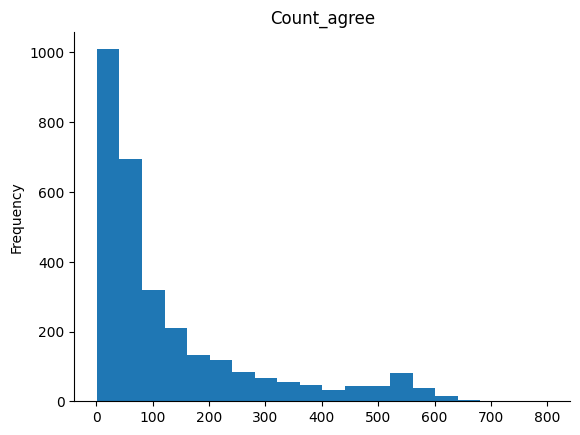

In [ ]:
# @title Count_agree

from matplotlib import pyplot as plt
Votes['Count_agree'].plot(kind='hist', bins=20, title='Count_agree')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print(Votes['content'][0])

il faut encourager les marques à sélectionner leurs fournisseurs à partir de critères  éthiques et non seulement économiques.


In [ ]:
print(Votes['preprocessed_content'][0])

falloir encourager marque selectionner fournisseur partir critere ethique non economique


In [ ]:
all_text = ' '.join(Votes['preprocessed_content'])

In [ ]:
all_text

"falloir encourager marque selectionner fournisseur partir critere ethique non economique falloir eviter fabriquer enfant vetement necessaire chaussure bebe falloir prevention risque sante textile utiliser matiere chimique perturbateur endocrinien falloir falloir acheter trop vetement utiliser mauvais qualite falloir cesser promouvoir mode changeant privilegiant vetement durable solide bon qualite falloir supprimer methode sablage vieillir vetement falloir encourager marque produire Europe matiere durable ecoresponsable naturel bio recycler falloir lourdement taxer transport porte-container pollution fort travailleur quasi-esclave falloir imposer marque affichage etiquette notation clearfashion falloir changer procede teinture teinture polluant energivore falloir faire recyclage utiliser chute reconfectionner falloir arreter importer produit Chine pays respecter environnement droit homme falloir aider re-apprendre coudre main machine permettre reparer transformer relooker vetement fall

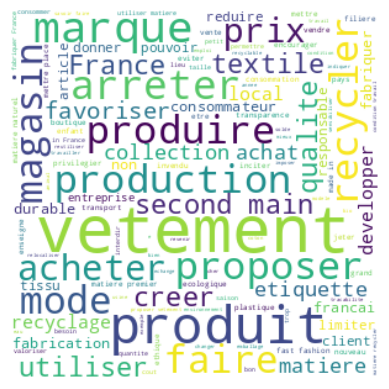

In [ ]:
# Définir les mots à exclure
excluded_words = {"falloir"}  # Ajoutez d'autres mots à exclure si nécessaire

# Créer une instance de WordCloud en spécifiant les mots à exclure
wc = WordCloud(width=300, height=300, background_color="white", stopwords=excluded_words)

# Générer le nuage de mots
wc.generate(all_text)

# Afficher le nuage de mots
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


In [ ]:
all_text


"falloir encourager marque selectionner fournisseur partir critere ethique non economique falloir eviter fabriquer enfant vetement necessaire chaussure bebe falloir prevention risque sante textile utiliser matiere chimique perturbateur endocrinien falloir falloir acheter trop vetement utiliser mauvais qualite falloir cesser promouvoir mode changeant privilegiant vetement durable solide bon qualite falloir supprimer methode sablage vieillir vetement falloir encourager marque produire Europe matiere durable ecoresponsable naturel bio recycler falloir lourdement taxer transport porte-container pollution fort travailleur quasi-esclave falloir imposer marque affichage etiquette notation clearfashion falloir changer procede teinture teinture polluant energivore falloir faire recyclage utiliser chute reconfectionner falloir arreter importer produit Chine pays respecter environnement droit homme falloir aider re-apprendre coudre main machine permettre reparer transformer relooker vetement fall

In [ ]:
Votes['nombre_mots'] = Votes['preprocessed_content'].apply(lambda x: len(x.split()))
nombre_moyen_mots = Votes['nombre_mots'].mean()
nombre_moyen_mots

9.01068090787717

In [ ]:

sentences = [text.split() for text in Votes['preprocessed_content']]
word2vec_model = Word2Vec(sentences, vector_size=70, window=10, min_count=1, sg=1, epochs=10)

words = list(word2vec_model.wv.index_to_key)

word_vectors = [word2vec_model.wv[word] for word in words]

In [ ]:
word2vec_model.wv["surproduire"]

array([ 5.74855367e-03,  1.07995600e-01, -1.62497982e-01, -1.12495432e-03,
       -2.27924868e-01,  5.22477366e-02, -8.58191699e-02,  1.45373657e-01,
        6.59237104e-03, -2.62402534e-01,  1.86723053e-01,  7.24537857e-03,
        1.43464506e-01, -1.92964509e-01, -2.91513037e-02,  6.91841617e-02,
        1.28332665e-02, -1.85436802e-04, -1.15146860e-01, -1.76791161e-01,
       -2.07110614e-01, -2.43089870e-01, -1.64493650e-01, -1.16175942e-01,
       -1.57315552e-01, -1.01848498e-01, -4.85839508e-02, -3.68809998e-02,
       -1.02165677e-01,  3.11389297e-01, -1.03056975e-01, -1.10987604e-01,
        3.60272616e-01, -2.03084126e-02,  2.13082984e-01, -3.24510843e-01,
       -9.95956216e-05, -1.91922233e-01, -3.18295471e-02,  3.74671035e-02,
        2.35361099e-01,  1.59058012e-02, -4.56385165e-02,  1.54700726e-01,
        9.77458432e-02,  1.71403050e-01,  1.43680349e-01,  4.15462069e-02,
       -1.22701630e-01,  1.03634354e-02,  9.32671353e-02,  1.09480180e-01,
       -1.21755809e-01,  

In [ ]:
word_vectors

[array([-0.00281789,  0.11852875, -0.13281102,  0.08869409, -0.26329648,
        -0.02735934, -0.01388266,  0.14586759, -0.08730212, -0.28926456,
         0.31269047, -0.04598037,  0.14694256, -0.16241483, -0.1378685 ,
         0.10599779,  0.19660342,  0.03656136, -0.17293893, -0.29421768,
        -0.13836701, -0.37351617, -0.24584225, -0.05289598, -0.10404558,
        -0.09070417,  0.00976823,  0.04760037, -0.25527447,  0.29709947,
        -0.16580105, -0.10445289,  0.5911712 , -0.14861442,  0.34934503,
        -0.35204363, -0.00971564, -0.16359437, -0.06856871, -0.07779402,
         0.06427279,  0.01612573, -0.1350105 ,  0.12473913,  0.07902268,
         0.16128959,  0.05484024,  0.30730343, -0.00602504,  0.08168452,
        -0.01216194,  0.09561291, -0.12710194,  0.2632617 ,  0.4643292 ,
         0.11465739,  0.30588803,  0.23159145, -0.2961821 ,  0.19790187,
         0.03863059,  0.21991383, -0.18765973, -0.15242669,  0.05800318,
         0.10651679,  0.04722364, -0.13894174, -0.1

In [ ]:
# Création de la DataFrame globale avec une colonne pour chaque mot et sa vectorisation
columns = ['mot'] + [f'vect_{i}' for i in range(word2vec_model.vector_size)]
data = np.column_stack((words, word_vectors))
global_df = pd.DataFrame(data, columns=columns)

# Affichage du DataFrame résultant
global_df.head()

mot         vect_0       vect_1       vect_2        vect_3  \
0   falloir  -0.0028178915   0.11852875  -0.13281102    0.08869409   
1  vetement     0.13783102   0.18854441  -0.39475983   -0.12628187   
2   produit    -0.03964194   0.12595563  -0.30549318  -0.087302715   
3   matiere    -0.06970428   0.05821338  -0.13895722  -0.110756174   
4    marque    0.051820688  0.072903916  -0.35976434  -0.057048216   

        vect_4        vect_5        vect_6      vect_7        vect_8  ...  \
0  -0.26329648   -0.02735934  -0.013882657  0.14586759   -0.08730212  ...   
1   -0.2889226   -0.20044062  -0.067461975  0.21771342    0.12656431  ...   
2  -0.15379053  -0.047675084    0.07924326  0.24023241  -0.097419105  ...   
3   -0.3522303    -0.2733713    0.39861086   0.4115762    -0.1202494  ...   
4  -0.22817455   -0.14941329   -0.25287983    0.380253    0.15369593  ...   

        vect_60     vect_61      vect_62       vect_63      vect_64  \
0   0.038630594  0.21991383  -0.18765973   -0.15242669  0.058003176   
1    0.06638988  0.13803497  -0.10589136     -0.119053   0.17023975   
2    0.10151358  0.28368947    -0.300774    -0.2687259  0.084831454   
3    0.29361594   0.2729274   -0.1730246   0.009382069  -0.25697204   
4  -0.011916099  0.16551161  0.051554974  -0.042079084    0.3886098   

      vect_65       vect_66       vect_67      vect_68       vect_69  
0  0.10651679   0.047223642   -0.13894174  -0.11706204   -0.09953851  
1  0.42303553   -0.10528022  -0.016203316  -0.06689609   -0.07565119  
2  0.22570613  -0.093462296   -0.31423867  -0.25505865  -0.065338925  
3   0.6484674   -0.23037446   -0.18398853  -0.22510119   -0.10021308  
4  0.28608555   0.099182665   -0.06141055   -0.1439462      -0.29396  

[5 rows x 71 columns]

In [ ]:
# Supposons que vous avez déjà entraîné votre modèle Word2Vec et stocké dans la variable `word2vec_model`

# Obtenir les mots les plus similaires à un mot donné
word = "recyclage"  # Remplacez "apple" par le mot pour lequel vous souhaitez trouver les mots similaires
similar_words = word2vec_model.wv.most_similar(word, topn=10)

# Afficher les mots similaires et leurs scores de similarité
for similar_word, similarity_score in similar_words:
    print(f"{similar_word}: {similarity_score}")


collecte: 0.9482510685920715
propre: 0.9467980861663818
contre: 0.9443203210830688
reprise: 0.9418515563011169
faciliter: 0.9411418437957764
circulaire: 0.9383865594863892
organiser: 0.9346950054168701
reseau: 0.9333293437957764
troc: 0.926717221736908
chaussure: 0.9261534214019775


In [ ]:
global_df.shape

(3146, 71)

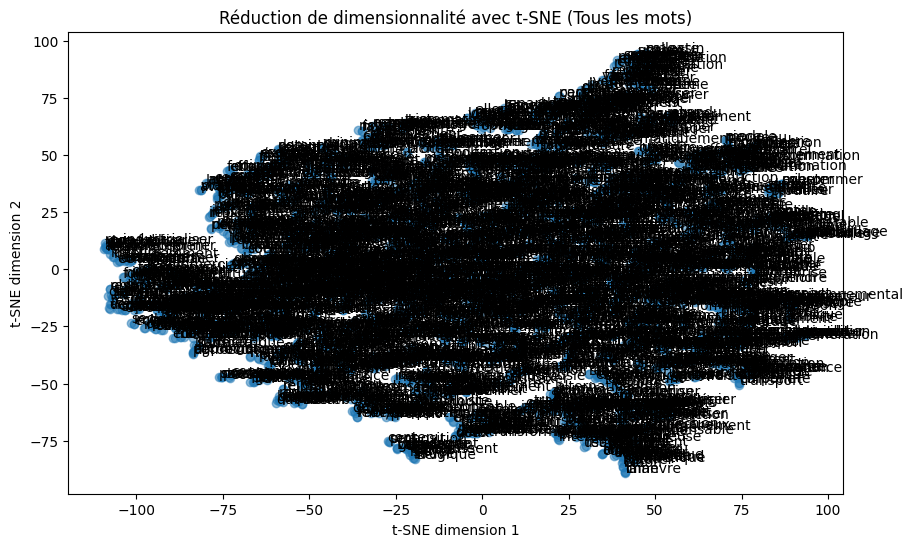

In [ ]:

# Sélection des vecteurs de mots pour la visualisation
X_all = global_df.drop('mot', axis=1).values
words_all = global_df['mot'].values

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # perplexity peut être ajusté
X_2d_all = tsne.fit_transform(X_all)

# Affichage des mots dans un repère 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_2d_all[:, 0], X_2d_all[:, 1], alpha=0.5)

# Ajout des étiquettes de mots
for i, word in enumerate(words_all):
    plt.annotate(word, (X_2d_all[i, 0], X_2d_all[i, 1]))

plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.title('Réduction de dimensionnalité avec t-SNE (Tous les mots)')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Création de la figure
fig = go.Figure()

# Ajout des points pour chaque mot
for i, word in enumerate(words_all):
    fig.add_trace(go.Scatter(x=[X_2d_all[i, 0]], y=[X_2d_all[i, 1]], mode='markers', name=word, text=word))

# Mise en forme de la figure
fig.update_layout(title='Réduction de dimensionnalité avec t-SNE (Tous les mots)',
                  xaxis_title='t-SNE dimension 1',
                  yaxis_title='t-SNE dimension 2',
                  hovermode='closest')

# Affichage de la figure
fig.show()


In [ ]:
# Convertir chaque ligne de la colonne 'Votes' en une liste de mots
Votes['tokenized_words'] = Votes['preprocessed_content'].apply(lambda x: x.split())

In [ ]:
Votes

content  \
0     il faut encourager les marques à sélectionner ...   
1     Il faut éviter de fabriquer pour les enfants d...   
2     Il faut de la prévention sur les risques pour ...   
3     Il faut ne faut pas acheter trop de vêtements ...   
4     Il faut cesser de promouvoir des modes très ch...   
...                                                 ...   
2991       Il faut favoriser le recyclage de vêtements    
2992  Il faut proposer des vêtements modulables,supe...   
2993  Il faut toujours afficher le lien de fabricati...   
2994  Il faut supprimer les produits chimiques dans ...   
2995  Il faut mentionner le nombre de personnes qui ...   

                                                  votes  Count_agree  \
0     [{'voteKey': 'agree', 'count': 466, 'qualifica...        466.0   
1     [{'voteKey': 'agree', 'count': 7, 'qualificati...          7.0   
2     [{'voteKey': 'agree', 'count': 234, 'qualifica...        234.0   
3     [{'voteKey': 'agree', 'count': 29, 'qualificat...         29.0   
4     [{'voteKey': 'agree', 'count': 269, 'qualifica...        269.0   
...                                                 ...          ...   
2991  [{'voteKey': 'agree', 'count': 95, 'qualificat...         95.0   
2992  [{'voteKey': 'agree', 'count': 21, 'qualificat...         21.0   
2993  [{'voteKey': 'agree', 'count': 153, 'qualifica...        153.0   
2994  [{'voteKey': 'agree', 'count': 141, 'qualifica...        141.0   
2995  [{'voteKey': 'agree', 'count': 19, 'qualificat...         19.0   

      Count_likeIt_agree  Count_doable_agree  Count_platitudeAgree_agree  \
0                   95.0               118.0                        25.0   
1                    2.0                 1.0                         2.0   
2                   46.0                70.0                        12.0   
3                    8.0                 4.0                         7.0   
4                   63.0                69.0                        15.0   
...                  ...                 ...                         ...   
2991                14.0                25.0                        11.0   
2992                 1.0                 9.0                         3.0   
2993                26.0                49.0                        10.0   
2994                21.0                38.0                        12.0   
2995                 3.0                 6.0                         0.0   

      Count_disagree  Count_noWay_disagree  Count_impossible_disagree  \
0                8.0                   0.0                        3.0   
1                2.0                   0.0                        0.0   
2                8.0                   1.0                        2.0   
3                2.0                   0.0                        0.0   
4               12.0                   3.0                        3.0   
...              ...                   ...                        ...   
2991             1.0                   0.0                        0.0   
2992             4.0                   0.0                        0.0   
2993             9.0                   0.0                        1.0   
2994             5.0                   0.0                        3.0   
2995             3.0                   0.0                        3.0   

      Count_platitudeDisagree_disagree  Count_neutral  \
0                                  3.0           28.0   
1                                  1.0            4.0   
2                                  1.0           28.0   
3                                  1.0            7.0   
4                                  1.0           42.0   
...                                ...            ...   
2991                               1.0            4.0   
2992                               0.0           17.0   
2993                               4.0           25.0   
2994                               0.0           13.0   
2995                               0.0           13.0   


In [ ]:
# Convertir chaque ligne de la colonne 'Votes' en une liste de mots
Votes['tokenized_words'] = Votes['preprocessed_content'].apply(lambda x: x.split())

# Fonction pour calculer la moyenne des vecteurs de mots
def calculate_average_vector(tokens):
    vectors = []
    for token in tokens:
        # Vérifiez si le mot est présent dans les vecteurs Word2Vec
        if token in word2vec_model.wv:
            # Récupérez le vecteur correspondant à ce mot
            vector = word2vec_model.wv[token]
            vectors.append(vector)
    # Calculez la moyenne des vecteurs
    if vectors:
        average_vector = np.mean(vectors, axis=0)
    else:
        average_vector = np.zeros_like(word2vec_model.wv[word2vec_model.wv.index_to_key[0]])
    return average_vector

# Appliquer la fonction pour calculer la moyenne des vecteurs pour chaque ligne
Votes['average_vector'] = Votes['tokenized_words'].apply(calculate_average_vector)

# Afficher la DataFrame résultante
(Votes.head())


content  \
0  il faut encourager les marques à sélectionner ...   
1  Il faut éviter de fabriquer pour les enfants d...   
2  Il faut de la prévention sur les risques pour ...   
3  Il faut ne faut pas acheter trop de vêtements ...   
4  Il faut cesser de promouvoir des modes très ch...   

                                               votes  Count_agree  \
0  [{'voteKey': 'agree', 'count': 466, 'qualifica...        466.0   
1  [{'voteKey': 'agree', 'count': 7, 'qualificati...          7.0   
2  [{'voteKey': 'agree', 'count': 234, 'qualifica...        234.0   
3  [{'voteKey': 'agree', 'count': 29, 'qualificat...         29.0   
4  [{'voteKey': 'agree', 'count': 269, 'qualifica...        269.0   

   Count_likeIt_agree  Count_doable_agree  Count_platitudeAgree_agree  \
0                95.0               118.0                        25.0   
1                 2.0                 1.0                         2.0   
2                46.0                70.0                        12.0   
3                 8.0                 4.0                         7.0   
4                63.0                69.0                        15.0   

   Count_disagree  Count_noWay_disagree  Count_impossible_disagree  \
0             8.0                   0.0                        3.0   
1             2.0                   0.0                        0.0   
2             8.0                   1.0                        2.0   
3             2.0                   0.0                        0.0   
4            12.0                   3.0                        3.0   

   Count_platitudeDisagree_disagree  Count_neutral  \
0                               3.0           28.0   
1                               1.0            4.0   
2                               1.0           28.0   
3                               1.0            7.0   
4                               1.0           42.0   

   Count_doNotUnderstand_neutral  Count_noOpinion_neutral  \
0                            3.0                      6.0   
1                            0.0                      0.0   
2                            1.0                      9.0   
3                            1.0                      2.0   
4                            1.0                      8.0   

   Count_doNotCare_neutral                               preprocessed_content  \
0                      8.0  falloir encourager marque selectionner fournis...   
1                      0.0  falloir eviter fabriquer enfant vetement neces...   
2                      4.0  falloir prevention risque sante textile utilis...   
3                      2.0  falloir falloir acheter trop vetement utiliser...   
4                      9.0  falloir cesser promouvoir mode changeant privi...   

   nombre_mots                                    tokenized_words  \
0           10  [falloir, encourager, marque, selectionner, fo...   
1            8  [falloir, eviter, fabriquer, enfant, vetement,...   
2           10  [falloir, prevention, risque, sante, textile, ...   
3            8  [falloir, falloir, acheter, trop, vetement, ut...   
4           11  [falloir, cesser, promouvoir, mode, changeant,...   

                                      average_vector  
0  [0.008060005, 0.13512474, -0.26368943, -0.0175...  
1  [0.016121581, 0.1392575, -0.2346984, -0.032697...  
2  [-0.0025586938, 0.115383826, -0.15573797, -0.0...  
3  [0.06465528, 0.056876518, -0.23048618, -0.0680...  
4  [0.046490207, 0.084390186, -0.24276161, -0.035...

In [ ]:
# Convertir la colonne average_vector en un tableau numpy
X = np.array(Votes['average_vector'].tolist())

# Réduction de dimensionnalité avec t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X)

# Création d'une DataFrame pour stocker les coordonnées t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_dim1', 'tsne_dim2'])

# Ajout de la DataFrame t-SNE à la DataFrame Votes
Votes = pd.concat([Votes, tsne_df], axis=1)

# Affichage des résultats




In [ ]:
# Création de la figure
fig = go.Figure()

# Ajout des points pour chaque mot
for i, row in Votes.iterrows():
    fig.add_trace(go.Scatter(x=[row['tsne_dim1']], y=[row['tsne_dim2']], mode='markers', name=row['content'], text=row['content']))

# Mise en forme de la figure
fig.update_layout(title='Réduction de dimensionnalité avec t-SNE (Tous les mots)',
                  xaxis_title='t-SNE dimension 1',
                  yaxis_title='t-SNE dimension 2',
                  hovermode='closest')

# Affichage de la figure
fig.show()


In [ ]:


tfidf_matrix = Votes[['tsne_dim1',"tsne_dim2"]]

# Clustering des textes
kmeans = KMeans(n_clusters=13)  # Nombre de clusters à définir
kmeans.fit(tfidf_matrix)

# Ajout des labels de cluster à la DataFrame
Votes['cluster'] = kmeans.labels_

# Plot interactif avec Plotly
fig = px.scatter(Votes, x='tsne_dim1', y='tsne_dim2', color='cluster', hover_data=['content'])
fig.show()


In [ ]:


X = Votes[['tsne_dim1',"tsne_dim2"]]




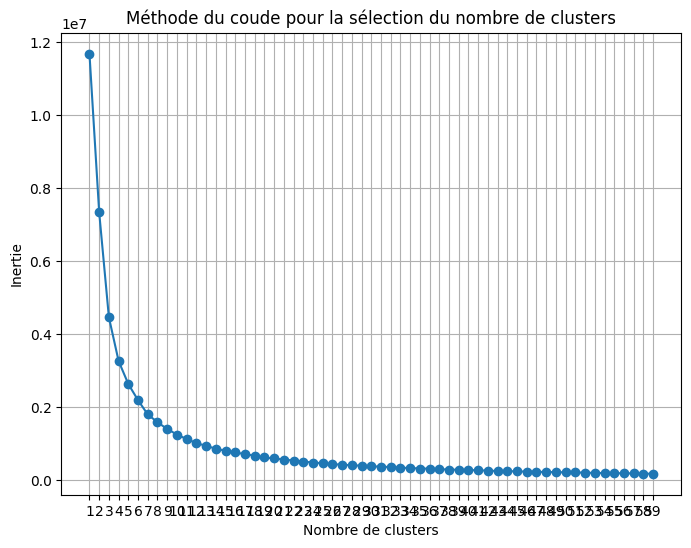

In [ ]:
# Calcul de l'inertie pour différentes valeurs de k
inertia = []
for k in range(1, 60):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Tracé du coude (Elbow)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 60), inertia, marker='o')
plt.title('Méthode du coude pour la sélection du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.xticks(range(1, 60))
plt.grid(True)
plt.show()


In [ ]:
# Définition du modèle de clustering agglomératif
# Nous définissons ici le nombre de clusters à rechercher (n_clusters)
# Vous pouvez ajuster ce paramètre en fonction de vos besoins
clustering = AgglomerativeClustering(n_clusters=13)

# Ajustement du modèle aux données
clustering.fit(X)


AgglomerativeClustering(n_clusters=13)

In [ ]:
# Ajout des labels de cluster à la DataFrame
Votes['cluster'] = clustering.labels_

# Plot interactif avec Plotly
fig = px.scatter(Votes, x='tsne_dim1', y='tsne_dim2', color='cluster', hover_data=['content'])
fig.show()


In [ ]:
Votes

content  \
0     il faut encourager les marques à sélectionner ...   
1     Il faut éviter de fabriquer pour les enfants d...   
2     Il faut de la prévention sur les risques pour ...   
3     Il faut ne faut pas acheter trop de vêtements ...   
4     Il faut cesser de promouvoir des modes très ch...   
...                                                 ...   
2991       Il faut favoriser le recyclage de vêtements    
2992  Il faut proposer des vêtements modulables,supe...   
2993  Il faut toujours afficher le lien de fabricati...   
2994  Il faut supprimer les produits chimiques dans ...   
2995  Il faut mentionner le nombre de personnes qui ...   

                                                  votes  Count_agree  \
0     [{'voteKey': 'agree', 'count': 466, 'qualifica...        466.0   
1     [{'voteKey': 'agree', 'count': 7, 'qualificati...          7.0   
2     [{'voteKey': 'agree', 'count': 234, 'qualifica...        234.0   
3     [{'voteKey': 'agree', 'count': 29, 'qualificat...         29.0   
4     [{'voteKey': 'agree', 'count': 269, 'qualifica...        269.0   
...                                                 ...          ...   
2991  [{'voteKey': 'agree', 'count': 95, 'qualificat...         95.0   
2992  [{'voteKey': 'agree', 'count': 21, 'qualificat...         21.0   
2993  [{'voteKey': 'agree', 'count': 153, 'qualifica...        153.0   
2994  [{'voteKey': 'agree', 'count': 141, 'qualifica...        141.0   
2995  [{'voteKey': 'agree', 'count': 19, 'qualificat...         19.0   

      Count_likeIt_agree  Count_doable_agree  Count_platitudeAgree_agree  \
0                   95.0               118.0                        25.0   
1                    2.0                 1.0                         2.0   
2                   46.0                70.0                        12.0   
3                    8.0                 4.0                         7.0   
4                   63.0                69.0                        15.0   
...                  ...                 ...                         ...   
2991                14.0                25.0                        11.0   
2992                 1.0                 9.0                         3.0   
2993                26.0                49.0                        10.0   
2994                21.0                38.0                        12.0   
2995                 3.0                 6.0                         0.0   

      Count_disagree  Count_noWay_disagree  Count_impossible_disagree  \
0                8.0                   0.0                        3.0   
1                2.0                   0.0                        0.0   
2                8.0                   1.0                        2.0   
3                2.0                   0.0                        0.0   
4               12.0                   3.0                        3.0   
...              ...                   ...                        ...   
2991             1.0                   0.0                        0.0   
2992             4.0                   0.0                        0.0   
2993             9.0                   0.0                        1.0   
2994             5.0                   0.0                        3.0   
2995             3.0                   0.0                        3.0   

      Count_platitudeDisagree_disagree  ...  Count_doNotUnderstand_neutral  \
0                                  3.0  ...                            3.0   
1                                  1.0  ...                            0.0   
2                                  1.0  ...                            1.0   
3                                  1.0  ...                            1.0   
4                                  1.0  ...                            1.0   
...                                ...  ...                            ...   
2991                               1.0  ...                            0.0   
2992                               0.0  ...                 

In [ ]:

from collections import Counter
# Mots à exclure
excluded_words = {'falloir','vetement','produit'}

# Fonction pour trouver les mots les plus fréquents par cluster
def get_top_words_by_cluster(df, cluster_col, words_col, top_n=5, excluded_words=set()):
    clusters = df[cluster_col].unique()
    top_words_by_cluster = {}

    for cluster in clusters:
        words = df[df[cluster_col] == cluster][words_col].explode()
        filtered_words = (word for word in words if word not in excluded_words)
        word_counts = Counter(filtered_words)
        top_words_by_cluster[cluster] = word_counts.most_common(top_n)

    return top_words_by_cluster

# Obtenir les mots les plus fréquents pour chaque cluster
top_words = get_top_words_by_cluster(Votes, 'cluster', 'tokenized_words', top_n=5, excluded_words=excluded_words)

# Afficher les résultats
for cluster, words in top_words.items():
    print(f"Cluster {cluster}:")
    for word, count in words:
        print(f"  {word}: {count}")

Cluster 2:
  fabriquer: 47
  qualite: 40
  matiere: 39
  fabrication: 31
  production: 30
Cluster 12:
  marque: 25
  faire: 22
  proposer: 21
  couture: 15
  mettre: 15
Cluster 6:
  matiere: 162
  naturel: 83
  utiliser: 76
  lin: 64
  coton: 58
Cluster 3:
  produire: 60
  qualite: 58
  faire: 43
  arreter: 42
  acheter: 36
Cluster 9:
  recycler: 51
  matiere: 47
  recyclage: 31
  utiliser: 28
  tissu: 24
Cluster 11:
  mettre: 29
  mode: 27
  production: 26
  vie: 24
  marque: 24
Cluster 1:
  impact: 70
  consommateur: 60
  environnemental: 59
  mode: 39
  social: 38
Cluster 8:
  condition: 54
  travail: 47
  production: 39
  fabrication: 39
  matiere: 38
Cluster 0:
  second: 114
  main: 111
  proposer: 92
  recycler: 84
  magasin: 83
Cluster 4:
  France: 130
  production: 68
  francais: 53
  in: 51
  local: 46
Cluster 5:
  collection: 121
  arreter: 70
  qualite: 39
  nombre: 35
  produire: 34
Cluster 10:
  plastique: 83
  emballage: 46
  sac: 31
  cuir: 31
  cintre: 29
Cluster 7:
  m

In [ ]:

# Mots à exclure
excluded_words = {'falloir', 'vetement', 'produit'}

# Fonction pour trouver les mots les plus fréquents par cluster
def get_top_words_by_cluster(df, cluster_col, words_col, top_n=5, excluded_words=set()):
    clusters = df[cluster_col].unique()
    top_words_by_cluster = {}

    for cluster in clusters:
        words = df[df[cluster_col] == cluster][words_col].explode()
        filtered_words = (word for word in words if word not in excluded_words)
        word_counts = Counter(filtered_words)
        top_words_by_cluster[cluster] = word_counts.most_common(top_n)

    return top_words_by_cluster

# Obtenir les mots les plus fréquents pour chaque cluster
top_words = get_top_words_by_cluster(Votes, 'cluster', 'tokenized_words', top_n=5, excluded_words=excluded_words)

# Construction des phrases avec les mots récurrents
cluster_sentences = {}

for cluster, words in top_words.items():
    word_list = [word for word, count in words]
    sentence = "Les thèmes principaux de ce cluster sont : " + ", ".join(word_list)
    cluster_sentences[cluster] = sentence

# Afficher les phrases
for cluster, sentence in cluster_sentences.items():
    print(f"Cluster {cluster}: {sentence}")


Cluster 2: Les thèmes principaux de ce cluster sont : fabriquer, qualite, matiere, fabrication, production
Cluster 12: Les thèmes principaux de ce cluster sont : marque, faire, proposer, couture, mettre
Cluster 6: Les thèmes principaux de ce cluster sont : matiere, naturel, utiliser, lin, coton
Cluster 3: Les thèmes principaux de ce cluster sont : produire, qualite, faire, arreter, acheter
Cluster 9: Les thèmes principaux de ce cluster sont : recycler, matiere, recyclage, utiliser, tissu
Cluster 11: Les thèmes principaux de ce cluster sont : mettre, mode, production, vie, marque
Cluster 1: Les thèmes principaux de ce cluster sont : impact, consommateur, environnemental, mode, social
Cluster 8: Les thèmes principaux de ce cluster sont : condition, travail, production, fabrication, matiere
Cluster 0: Les thèmes principaux de ce cluster sont : second, main, proposer, recycler, magasin
Cluster 4: Les thèmes principaux de ce cluster sont : France, production, francais, in, local
Cluster 5: 

In [ ]:
Votes

content  \
0     il faut encourager les marques à sélectionner ...   
1     Il faut éviter de fabriquer pour les enfants d...   
2     Il faut de la prévention sur les risques pour ...   
3     Il faut ne faut pas acheter trop de vêtements ...   
4     Il faut cesser de promouvoir des modes très ch...   
...                                                 ...   
2991       Il faut favoriser le recyclage de vêtements    
2992  Il faut proposer des vêtements modulables,supe...   
2993  Il faut toujours afficher le lien de fabricati...   
2994  Il faut supprimer les produits chimiques dans ...   
2995  Il faut mentionner le nombre de personnes qui ...   

                                                  votes  Count_agree  \
0     [{'voteKey': 'agree', 'count': 466, 'qualifica...        466.0   
1     [{'voteKey': 'agree', 'count': 7, 'qualificati...          7.0   
2     [{'voteKey': 'agree', 'count': 234, 'qualifica...        234.0   
3     [{'voteKey': 'agree', 'count': 29, 'qualificat...         29.0   
4     [{'voteKey': 'agree', 'count': 269, 'qualifica...        269.0   
...                                                 ...          ...   
2991  [{'voteKey': 'agree', 'count': 95, 'qualificat...         95.0   
2992  [{'voteKey': 'agree', 'count': 21, 'qualificat...         21.0   
2993  [{'voteKey': 'agree', 'count': 153, 'qualifica...        153.0   
2994  [{'voteKey': 'agree', 'count': 141, 'qualifica...        141.0   
2995  [{'voteKey': 'agree', 'count': 19, 'qualificat...         19.0   

      Count_likeIt_agree  Count_doable_agree  Count_platitudeAgree_agree  \
0                   95.0               118.0                        25.0   
1                    2.0                 1.0                         2.0   
2                   46.0                70.0                        12.0   
3                    8.0                 4.0                         7.0   
4                   63.0                69.0                        15.0   
...                  ...                 ...                         ...   
2991                14.0                25.0                        11.0   
2992                 1.0                 9.0                         3.0   
2993                26.0                49.0                        10.0   
2994                21.0                38.0                        12.0   
2995                 3.0                 6.0                         0.0   

      Count_disagree  Count_noWay_disagree  Count_impossible_disagree  \
0                8.0                   0.0                        3.0   
1                2.0                   0.0                        0.0   
2                8.0                   1.0                        2.0   
3                2.0                   0.0                        0.0   
4               12.0                   3.0                        3.0   
...              ...                   ...                        ...   
2991             1.0                   0.0                        0.0   
2992             4.0                   0.0                        0.0   
2993             9.0                   0.0                        1.0   
2994             5.0                   0.0                        3.0   
2995             3.0                   0.0                        3.0   

      Count_platitudeDisagree_disagree  ...  Count_doNotUnderstand_neutral  \
0                                  3.0  ...                            3.0   
1                                  1.0  ...                            0.0   
2                                  1.0  ...                            1.0   
3                                  1.0  ...                            1.0   
4                                  1.0  ...                            1.0   
...                                ...  ...                            ...   
2991                               1.0  ...                            0.0   
2992                               0.0  ...                 

In [ ]:
# Fonction pour sélectionner le texte le plus similaire dans chaque cluster
def select_most_similar_text(df):
    # Grouper par cluster
    grouped = df.groupby('cluster')
    selected_texts = []

    # Parcourir chaque groupe
    for _, group in grouped:
        # Calculer la distance euclidienne entre chaque texte et les autres textes du même groupe
        distances = []
        for index, row in group.iterrows():
            point = np.array([row['tsne_dim1'], row['tsne_dim2']])
            other_points = group.drop(index)[['tsne_dim1', 'tsne_dim2']].values
            other_distances = np.linalg.norm(point - other_points, axis=1)
            distances.append(np.mean(other_distances))

        # Sélectionner le texte avec la plus faible distance moyenne
        selected_text_index = np.argmin(distances)
        selected_texts.append(group.iloc[selected_text_index]['content'])

    return selected_texts

# Obtenir les textes les plus similaires pour chaque cluster
selected_texts = select_most_similar_text(Votes)

# Afficher les résultats
for i, text in enumerate(selected_texts):
    print(f"Cluster {i}: Texte le plus similaire = {text}")


Cluster 0: Texte le plus similaire = Il faut proposer des services de réparation en magasin, de manière systématique.
Cluster 1: Texte le plus similaire = il faut impliquer les "infuenceuses /eurs" qui ont un impact  important sur les jeunes  générations . 
Cluster 2: Texte le plus similaire = Il faut produire français, sans que cela ait trop d’impact sur le prix d’un produit final à l’achat.
Cluster 3: Texte le plus similaire = Il faut donner une âme aux vêtements, recycler les invendus, produire local afin de réduire les coûts de transport et de stockage
Cluster 4: Texte le plus similaire = Il faut remettre des quotas à l'importation pour inciter les marques françaises à fabriquer leur tissu et confectionner en France et Europe
Cluster 5: Texte le plus similaire = Il faut que les marques arrêtent de produire à grande échelle mais plutôt qu'elles répondent à un besoin pour produire moins et mieux
Cluster 6: Texte le plus similaire = Il faut utiliser le plus possible de matières nature

In [ ]:
# Fonction pour trouver les mots les plus fréquents par cluster
def get_top_words_by_cluster(df, cluster_col, words_col, top_n=5):
    clusters = df[cluster_col].unique()
    top_words_by_cluster = {}

    for cluster in clusters:
        words = df[df[cluster_col] == cluster][words_col].explode()
        word_counts = Counter(words)
        top_words_by_cluster[cluster] = word_counts.most_common(top_n)

    return top_words_by_cluster

# Obtenir les mots les plus fréquents pour chaque cluster
top_words = get_top_words_by_cluster(Votes, 'cluster', 'tokenized_words')

# Afficher les résultats
for cluster, words in top_words.items():
    print(f"Cluster {cluster}:")
    for word, count in words:
        print(f"  {word}: {count}")


Cluster 2:
  falloir: 215
  produit: 55
  vetement: 55
  fabriquer: 47
  qualite: 40
Cluster 12:
  falloir: 192
  vetement: 105
  marque: 25
  faire: 22
  proposer: 21
Cluster 6:
  falloir: 291
  matiere: 162
  naturel: 83
  utiliser: 76
  lin: 64
Cluster 3:
  falloir: 298
  vetement: 103
  produire: 60
  qualite: 58
  faire: 43
Cluster 9:
  falloir: 211
  vetement: 73
  recycler: 51
  matiere: 47
  recyclage: 31
Cluster 11:
  falloir: 223
  vetement: 49
  produit: 39
  mettre: 29
  mode: 27
Cluster 1:
  falloir: 252
  impact: 70
  consommateur: 60
  environnemental: 59
  vetement: 58
Cluster 8:
  falloir: 160
  condition: 54
  travail: 47
  production: 39
  fabrication: 39
Cluster 0:
  falloir: 351
  vetement: 246
  second: 114
  main: 111
  proposer: 92
Cluster 4:
  falloir: 234
  France: 130
  production: 68
  francais: 53
  in: 51
Cluster 5:
  falloir: 247
  collection: 121
  arreter: 70
  vetement: 43
  qualite: 39
Cluster 10:
  falloir: 170
  plastique: 83
  emballage: 46
  sac: 

In [ ]:

# Mots ou thèmes à exclure
excluded_words = {'falloir', 'fashion', 'clothing','vetement'}
excluded_themes = {'sustainable'}

# Fonction pour extraire le thème principal de chaque cluster en excluant certains mots ou thèmes
def extract_theme_by_cluster(df, cluster_col, words_col, excluded_words=set(), excluded_themes=set()):
    clusters = df[cluster_col].unique()
    themes = {}

    for cluster in clusters:
        words = df[df[cluster_col] == cluster][words_col].explode()
        # Filtrer les mots exclus
        filtered_words = [word for word in words if word not in excluded_words]
        word_counts = Counter(filtered_words)
        # Sélectionner le thème principal excluant les thèmes spécifiés
        theme = None
        for word, count in word_counts.most_common():
            if word not in excluded_themes:
                theme = word
                break
        themes[cluster] = theme

    return themes

# Obtenir le thème principal pour chaque cluster en excluant certains mots ou thèmes
cluster_themes = extract_theme_by_cluster(Votes, 'cluster', 'tokenized_words', excluded_words=excluded_words, excluded_themes=excluded_themes)

# Afficher les résultats
for cluster, theme in cluster_themes.items():
    print(f"Cluster {cluster}: Thème = {theme}")


Cluster 2: Thème = produit
Cluster 12: Thème = marque
Cluster 6: Thème = matiere
Cluster 3: Thème = produire
Cluster 9: Thème = recycler
Cluster 11: Thème = produit
Cluster 1: Thème = impact
Cluster 8: Thème = condition
Cluster 0: Thème = second
Cluster 4: Thème = France
Cluster 5: Thème = collection
Cluster 10: Thème = plastique
Cluster 7: Thème = marque


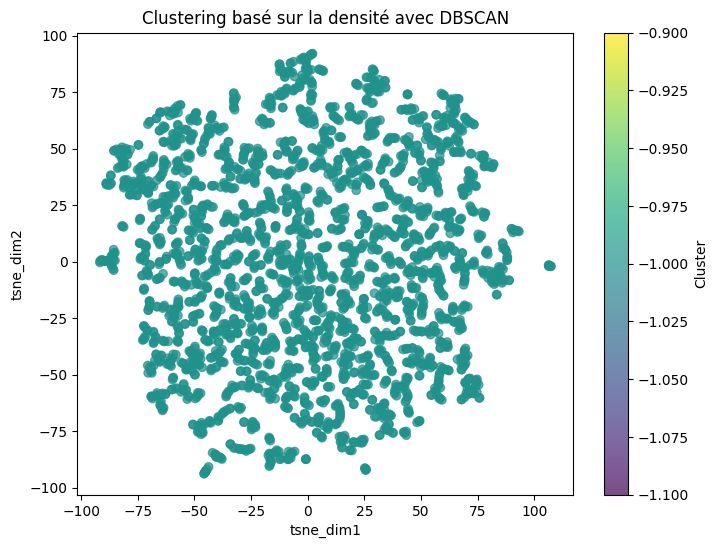

In [ ]:


# Récupération des données tsne_dim1 et tsne_dim2
X = Votes[['tsne_dim1', 'tsne_dim2']].values

# Création et ajustement du modèle DBSCAN
dbscan = DBSCAN(eps=0.000005, min_samples=20)
dbscan.fit(X)

# Affichage des points et des clusters trouvés par DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', marker='o', alpha=0.7)
plt.title('Clustering basé sur la densité avec DBSCAN')
plt.xlabel('tsne_dim1')
plt.ylabel('tsne_dim2')
plt.colorbar(label='Cluster')
plt.show()
